# Drive

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Impartation des librairies

In [27]:
import os, sys
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
import random
from skimage.io import imread,imsave,imshow
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Training images

In [28]:
os.chdir("/content/drive/MyDrive/Projet Manon/TrainingFlip")
os.getcwd()
files = os.listdir('.')
files = np.array(files)
print ('Files', files)
print('Shape files', files.shape)

Files ['Pat_0173_DPI_0129.jpg' 'Pat_0040_DPI_0040.jpg' 'Pat_0026_DPI_0059.jpg'
 ... 'Pat_0046_DPI_0110.jpg' 'Pat_0040_DPI_0063.jpg'
 'Pat_0026_DPI_0047.jpg']
Shape files (4136,)


# Validation images

In [29]:
os.chdir("/content/drive/MyDrive/Projet Manon/ValidationFlip")
os.getcwd()
val = os.listdir('.')
val = np.array(val)
print ('Val', val[0:10])
print('Shape val', val.shape)

Val ['Pat_0005_DPI_0124.jpg' 'Pat_0005_DPI_0118.jpg' 'Pat_0005_DPI_0130.jpg'
 'Pat_0002_DPI_0124.jpg' 'Pat_0002_DPI_0130.jpg' 'Pat_0002_DPI_0118.jpg'
 'Pat_0002_DPI_0050.jpg' 'Pat_0187_DPI_0023.jpg' 'Pat_0002_DPI_0078.jpg'
 'Pat_0002_DPI_0044.jpg']
Shape val (830,)


# Test images

In [30]:
os.chdir("/content/drive/MyDrive/Projet Manon/TestFlip")
os.getcwd()
test = os.listdir('.')
test = np.array(test)
print ('Test', test[0:10])
print('Shape test', test.shape)

Test ['Pat_0022_DPI_0113.jpg' 'Pat_0022_DPI_0107.jpg' 'Pat_0177_DPI_0063.jpg'
 'Pat_0177_DPI_0077.jpg' 'Pat_0177_DPI_0117.jpg' 'Pat_0177_DPI_0103.jpg'
 'Pat_0177_DPI_0088.jpg' 'Pat_0022_DPI_0067.jpg' 'Pat_0022_DPI_0073.jpg'
 'Pat_0022_DPI_0098.jpg']
Shape test (611,)


# Labels

In [31]:
targets = []


path = '/content/drive/MyDrive/Projet Manon/Patients DPI.csv'
df = pd.read_csv(path)
Pat_id = df['patID'].values.tolist()
print('Liste Pat_id : ',Pat_id)

list_DPI = df[['DPI']]
list_DPI = np.array(list_DPI)

for i in list_DPI :
  if i == 0 :
    targets.append([1,0,0,0])
  if i == 1 :
    targets.append([0,1,0,0])
  if i == 2 :
    targets.append([0,0,1,0])
  if i == 3 :
    targets.append([0,0,0,1])

targets = np.array(targets)



labels = np.empty ((len(files),4))
k=0
for im in files :
  j=0
  for i in Pat_id :
    if (im[0:8] == i) :
      labels[k]=targets[j]
      break
    else :
      j=j+1
  k=k+1

labels = labels.astype('int')
print('labels shape', labels.shape)



labels_val = np.empty ((len(val),4))
k=0
for im in val :
  j=0
  for i in Pat_id :
    if (im[0:8] == i) :
      labels_val[k]=targets[j]
      break
    else :
      j=j+1
  k=k+1

labels_val = labels_val.astype('int')
print('labels_val shape', labels_val.shape)



labels_test = np.empty ((len(test),4))
k=0
for im in test :
  j=0
  for i in Pat_id :
    if (im[0:8] == i) :
      labels_test[k]=targets[j]
      break
    else :
      j=j+1
  k=k+1

labels_test = labels_test.astype('int')
print('labels_test shape', labels_test.shape)

Liste Pat_id :  ['Pat_0002', 'Pat_0005', 'Pat_0015', 'Pat_0020', 'Pat_0022', 'Pat_0026', 'Pat_0027', 'Pat_0029', 'Pat_0036', 'Pat_0040', 'Pat_0046', 'Pat_0053', 'Pat_0055', 'Pat_0056', 'Pat_0058', 'Pat_0060', 'Pat_0067', 'Pat_0071', 'Pat_0073', 'Pat_0076', 'Pat_0080', 'Pat_0081', 'Pat_0082', 'Pat_0102', 'Pat_0103', 'Pat_0104', 'Pat_0106', 'Pat_0112', 'Pat_0113', 'Pat_0115', 'Pat_0117', 'Pat_0122', 'Pat_0126', 'Pat_0135', 'Pat_0139', 'Pat_0147', 'Pat_0150', 'Pat_0154', 'Pat_0157', 'Pat_0158', 'Pat_0162', 'Pat_0168', 'Pat_0170', 'Pat_0173', 'Pat_0175', 'Pat_0177', 'Pat_0185', 'Pat_0187', 'Pat_0189', 'Pat_0195', 'Pat_0197', 'Pat_0207', 'Pat_0209', 'Pat_0218', 'Pat_0235', 'Pat_0236', 'Pat_0242', 'Pat_0245', 'Pat_0246', 'Pat_0248', 'Pat_0249', 'Pat_0255']
labels shape (4136, 4)
labels_val shape (830, 4)
labels_test shape (611, 4)


# Permutaion random

In [32]:
perm = np.random.permutation(len(files))
labels = labels[perm]
files = files[perm]


permu = np.random.permutation(len(val))
labels_val = labels_val[permu]
val = val[permu]


permut = np.random.permutation(len(test))
labels_test = labels_test[permut]
test = test[permut]



print("Training on %d images and labels" % (len(files)))
print("Validation on %d images and labels" % (len(val)))
print("Test on %d images and labels" % (len(test)))

Training on 4136 images and labels
Validation on 830 images and labels
Test on 611 images and labels


# Mise en vecteur des images

In [33]:
from time import process_time

path = '/content/drive/MyDrive/Projet Manon/TrainingFlip'

tbegin = process_time()

features = []
features2 = []

for item in files[0:1000] :
  im = imread(os.path.join(path, item))
  features.append(np.array(im))
print(process_time() - tbegin)

for item in files[1000:2000] :
  im = imread(os.path.join(path, item))
  features.append(np.array(im))
print(process_time() - tbegin)

for item in files[2000:3000] :
  im = imread(os.path.join(path, item))
  features2.append(np.array(im))
print(process_time() - tbegin)

for item in files[3000:4136] :
  im = imread(os.path.join(path, item))
  features2.append(np.array(im))
print(process_time() - tbegin)

for item in features2:
  features.append(item)

features = np.array(features)
features = features.reshape(-1, 500, 500, 1)
print(features.shape)
#imshow(features[1])

print(process_time() - tbegin)


2.165494385000102
4.320289332000129
6.421278962000088
8.77607214600016
(4136, 500, 500, 1)
9.205283232000056


In [34]:
validation = []

tbegin = process_time()

pathv = "/content/drive/MyDrive/Projet Manon/ValidationFlip"


validation = []
validation2 = []

for item in val[0:504] :
  im = imread(os.path.join(pathv, item))
  validation.append(np.array(im))
print(process_time() - tbegin)


for item in val[504:830] :
  im = imread(os.path.join(pathv, item))
  validation.append(np.array(im))
print(process_time() - tbegin)

"""
for item in val[2000:3000] :
  im = imread(os.path.join(pathv, item))
  validation2.append(np.array(im))
print(process_time() - tbegin)

for item in val[3000:4136] :
  im = imread(os.path.join(pathv, item))
  validation2.append(np.array(im))

for item in validation2:
  validation.append(item)
"""

validation = np.array(validation)
validation = validation.reshape(-1, 500, 500,1)
print(validation.shape)


1.0401092990000507
1.7086120460000984
(830, 500, 500, 1)


In [35]:
testing = []

tbegin = process_time()

pathv = "/content/drive/MyDrive/Projet Manon/TestFlip"

for item in test :
  im = imread(os.path.join(pathv, item))
  testing.append(np.array(im))
print(process_time() - tbegin)

testing = np.array(testing)
testing = testing.reshape(-1, 500, 500,1)
print(testing.shape)


1.3162080150000293
(611, 500, 500, 1)


In [36]:
print(features.shape)
print(labels.shape)

print(validation.shape)
print(labels_val.shape)

print(testing.shape)
print(labels_test.shape)

(4136, 500, 500, 1)
(4136, 4)
(830, 500, 500, 1)
(830, 4)
(611, 500, 500, 1)
(611, 4)


# Keras model

In [37]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, Conv1D, Dropout, ReLU, Flatten, Input, BatchNormalization, Reshape, Conv2DTranspose, GlobalMaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import sigmoid, tanh
from keras.losses import binary_crossentropy, mse
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model= Sequential()
model.add(Conv2D(32, (5,5), input_shape=(500,500,1)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (5,5)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (5,5)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (5,5)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (5,5)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(4, (5,5)))
model.add(GlobalMaxPooling2D())
model.add(Activation('softmax'))

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=["acc"])


model.summary()

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(features, labels, epochs = 30, validation_data=(validation,labels_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 496, 496, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 248, 248, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 248, 248, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 244, 244, 32)      25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 122, 122, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 122, 122, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 118, 118, 64)     

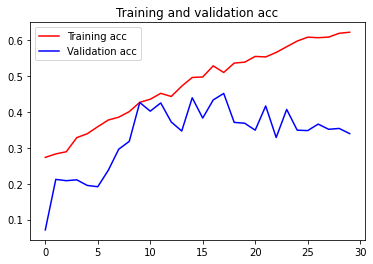

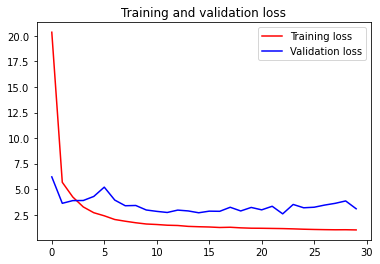

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend(loc=0)

plt.figure(2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)


plt.show()

# Predictions on validation

In [39]:
prediction = model.predict(validation) 
prediction = np.argmax(prediction, axis = 1) 
label = np.argmax(labels_val,axis = 1) 


print(prediction.shape) 
print(label.shape)

(830,)
(830,)


# Matrice de confusion

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = label
y_pred = prediction

cm = confusion_matrix(y_true, y_pred)
print(cm)


[[122 167  39 119]
 [  5   1  48   5]
 [ 78  61  32   0]
 [  0   0  26 127]]


Confusion matrix, without normalization
[[122 167  39 119]
 [  5   1  48   5]
 [ 78  61  32   0]
 [  0   0  26 127]]


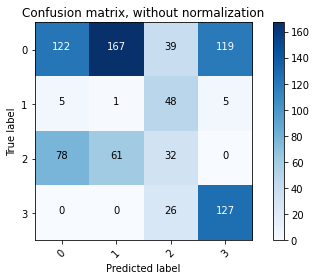

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0, 1, 2, 3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3],
                      title='Confusion matrix, without normalization')



# Evaluate Test

In [42]:
score = model.evaluate(testing, labels_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.6634352207183838
Test accuracy: 0.45499181747436523


In [43]:
pred = model.predict(testing) 
pred = np.argmax(pred, axis = 1) 
label = np.argmax(labels_test,axis = 1) 


print(pred.shape) 
print(label.shape)


(611,)
(611,)


In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = label
y_pred = pred

cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2,3])
print(cm)

[[113  36   4   0]
 [  0  42  92  19]
 [ 19  11 123   0]
 [ 95  21  36   0]]


Confusion matrix, without normalization
[[113  36   4   0]
 [  0  42  92  19]
 [ 19  11 123   0]
 [ 95  21  36   0]]


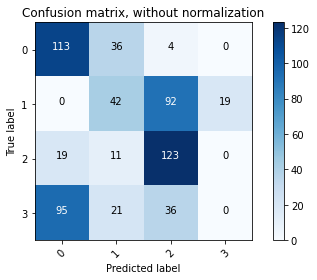

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0, 1, 2, 3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3],
                      title='Confusion matrix, without normalization')